# Práctica 3: Map-Reduce con datasets reales

En esta práctica veremos usos de MapReduce sobre datasets reales y relativamente grandes.

En este y en los siguientes ejercicios utilizaremos dos ficheros de entrada que han sido descargados del National Bureau of Economic Research (NBER) de EEUU (<http://www.nber.org/patents/>).

En concreto, usaremos los ficheros `cite75_99.txt` y `apat63_99.txt`. Podéis descargar estos dos ficheros, junto con el fichero `country_codes.txt`, desde [aquí](https://github.com/dsevilla/tcdm-public/raw/refs/heads/24-25/datos/patentes.tar.xz) (se descomprime con `tar -Jxf`).
Es este otro [enlace](https://github.com/dsevilla/tcdm-public/raw/refs/heads/24-25/datos/patentes-mini.tar.gz) podéis descargar una versión reducida de los datos para hacer pruebas rápidas.

Una descripción detallada de estos ficheros puede encontrarse en:

Hall, B. H., A. B. Jaffe, and M. Trajtenberg (2001). *The NBER Patent Citation Data File: Lessons, Insights and Methodological Tools*. NBER Working Paper 8498.

Para descargar los datos, en el shell de Unix (aquí se muestra para `patentes-mini`):

```bash
# Descarga de los ficheros
wget -qq https://github.com/dsevilla/tcdm-public/raw/refs/heads/24-25/datos/patentes-mini.tar.gz

# Descomprimimos
tar xzf patentes-mini.tar.gz

# Listamos ficheros
ls -lh patentes-mini/cite75_99.txt
head patentes-mini/cite75_99.txt
ls -lh patentes-mini/apat63_99.txt
head patentes-mini/apat63_99.txt
```

En el shell de Unix (aquí se muestra para `patentes`):

```bash
# Descarga de los ficheros
wget -qq https://github.com/dsevilla/tcdm-public/raw/refs/heads/24-25/datos/patentes.tar.xz

# Descomprimimos
tar -Jxf patentes.tar.xz

# Listamos ficheros
ls -lh patentes/cite75_99.txt
head patentes/cite75_99.txt
ls -lh patentes/apat63_99.txt
head patentes/apat63_99.txt
```

## Fichero `cite75_99.txt`

Este fichero contiene citas de patentes emitidas entre 1975 y 1990 en los EEUU. Es un fichero CSV (*comma-separated values*) con más de 16,5 millones de filas, y las primeras líneas son como sigue:

```
"CITING","CITED"
3858241,956203
3858241,1324234
3858241,3398406
3858241,3557384
3858241,3634889
3858242,1515701
3858242,3319261
3858242,3668705
..., ...
```

La primera línea contiene una cabecera con la descripción de las columnas. Cada una de las otras líneas indica una cita que la patente con el número de la primera columna ha hecho a la patente con el número en la segunda.  Por ejemplo, la segunda fila indica que la patente nº 3858241 ("citing" o *citante*) hace una cita a la patente nº 956203 ("cited" o citada). El fichero está ordenado por las patentes citantes. Así podemos ver que la patente nº 3858241 cita a otras 5 patentes.

Este fichero permite extraer conclusiones sobre las patentes que a primera vista están ocultas. Por ejemplo, en el siguiente gráfico\[1] se muestra una vista parcial del grafo de citaciones entre patentes:

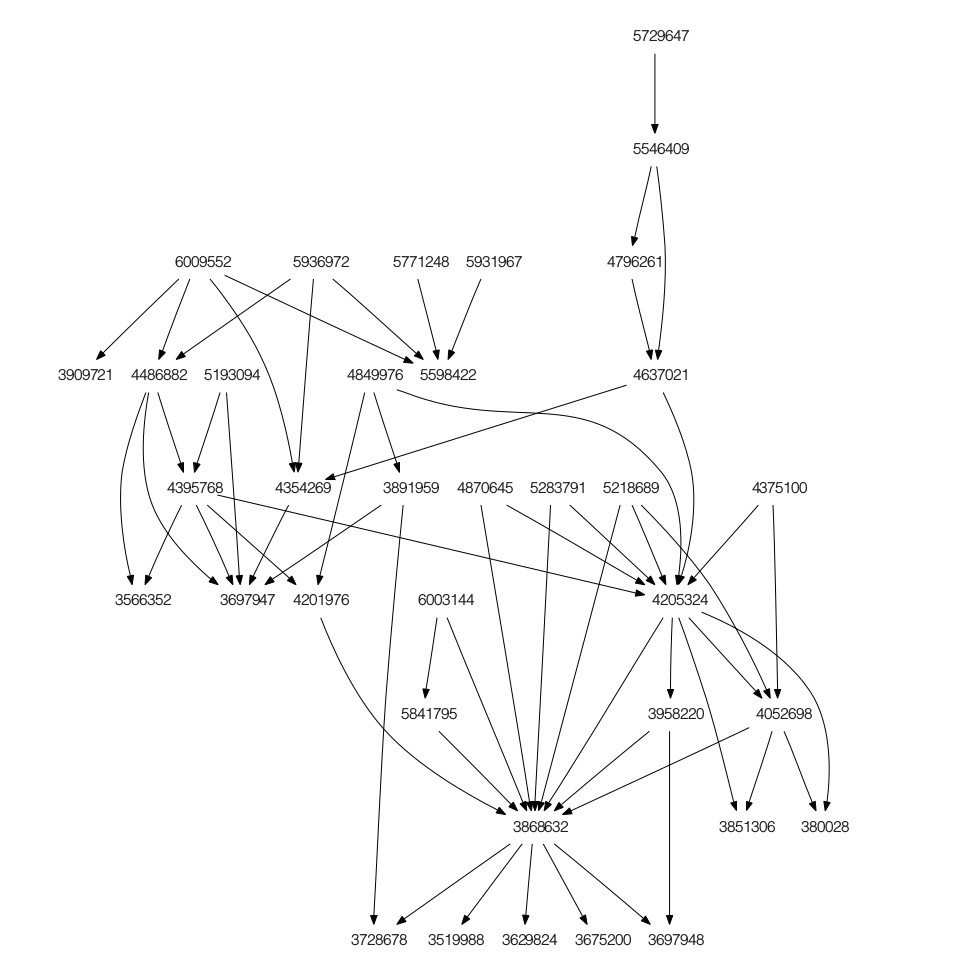

## Fichero `apat63_99.txt`

Este fichero contiene una descripción de las patentes. Es, de nuevo, un fichero CSV e incluye, entre otros campos, el número de patente, el año de solicitud ("APPYEAR"), el año de concesión ("GYEAR"), el país del primer inventor ("COUNTRY"), el número de reivindicaciones ("CLAIMS") y otros metadatos acerca de las patentes. Tiene más de 2,9 millones de filas, y las primeras de estas son:

```
"PATENT","GYEAR","GDATE","APPYEAR","COUNTRY","POSTATE","ASSIGNEE","ASSCODE","CLAIMS","NCLASS","CAT","SUBCAT","CMADE","CRECEIVE","RATIOCIT","GENERAL","ORIGINAL","FWDAPLAG","BCKGTLAG","SELFCTUB","SELFCTLB","SECDUPBD","SECDLWBD"
3070801,1963,1096,,"BE","",,1,,269,6,69,,1,,0,,,,,,,
3070802,1963,1096,,"US","TX",,1,,2,6,63,,0,,,,,,,,,
3070803,1963,1096,,"US","IL",,1,,2,6,63,,9,,0.3704,,,,,,,
3070804,1963,1096,,"US","OH",,1,,2,6,63,,3,,0.6667,,,,,,,
3070805,1963,1096,,"US","CA",,1,,2,6,63,,1,,0,,,,,,,
3070806,1963,1096,,"US","PA",,1,,2,6,63,,0,,,,,,,,,
3070807,1963,1096,,"US","OH",,1,,623,3,39,,3,,0.4444,,,,,,,
3070808,1963,1096,,"US","IA",,1,,623,3,39,,4,,0.375,,,,,,,
...
```

Al igual que en muchos datasets reales, algunos de los valores de este fichero están vacíos.


## Fichero `country_codes.txt`

Es un pequeño fichero conteniendo el nombre completo de los países
correspondientes a los códigos `COUNTRY` del fichero `apat63_99.txt`.

## **Actividad**: Programación en Hadoop MapReduce con Python 

### 1. Plantilla **citingpatents1**: programa MapReduce escrito en Python que, para cada patente de `cite75_99.txt`, obtenga la lista de las que la citan

- Formato salida: `patente patente1,patente2...` (la separación entre la clave y los valores debe ser un tabulado)

- El mapper debe obtener cada línea del fichero de entrada, separar los campos y darle la vuelta (para obtener como clave intermedia la patente citada y como valor intermedio la patente que la cita):
  - 3858245,3755824 → 3755824 3858245

- El reducer, para cada patente recibe como valor una lista de las que la citan, y tiene que convertir esa lista en un string: 
  - 3755824 [3858245, 3858247, ... ] → 3755824 3858245,3858247...

- **IMPORTANTE**:
  - La cabecera del fichero no debe aparecer en la salida.
  - La lista de números de patente en el campo valor de la salida debe estar separada por comas, y no debe de haber una coma al final.
  - Para ejecutar el trabajo se pueden usar las instrucciones vistas en el Tema 2.
  - Nótese que se utilizan dos protocolos, uno de entrada y otro de salida. Los protocolos especifican **cómo se va a generar la entrada o cómo se va a generar la salida**:
    - Como protocolo de entrada (`INPUT_PROTOCOL`) se usa `TextValueProtocol`, donde el texto de entrada se lee línea a línea y sólo genera el valor (la clave es vacía, no se requiere para este ejemplo)
    - Como protocolo de salida (`OUTPUT_PROTOCOL`) se usa `TextProtocol`, que por defecto escribe la clave y el valor separados por un tabulador.

### 2. Plantilla **citationnumberbypatent_chained2**: programa MapReduce que usa varios pasos para enlazar trabajos MapReduce

- Obtener el número de citas de una patente, combinando el programa anterior **citingpatents1** con un mapper adicional (`MRCitationNumberByPatentChained`) que, a partir de la salida del reducer del `citingpatents1`, para cada patente, cuente el número de patentes que la citan. 

- **IMPORTANTE**:
  - La salida debe de estar en texto plano con dos columnas (patente, nº de citas) por línea, **separadas por una coma** (sin espacios en blanco).
  - Se utiliza la función `steps` de MRJob (`MRStep`) para definir varios pasos en un trabajo MapReduce. Se reutiliza el mapper y reducer del paso anterior.
  - Se define un protocolo de salida, `CSVOutputProtocol`, que escribe la clave y el valor separados por una coma (por defecto MRJob lo escribe separados por un tabulador).

### 3. Plantilla **countrypatents3**: hacer un programa MapReduce *map-only* (sin reducers) que:

- Lea el fichero `apat63_99.txt`, separe los campos y lo guarde como un fichero en formato clave/valor con:
  - clave: el país, **reemplazando el código por el nombre completo usando el fichero `country_codes.txt`**.
  - valor: una cadena con la patente y el año separados por coma, **sin espacios en blanco**.
- El carácter de separación entre clave y valor de salida debe ser el por defecto (tabulador).
- **IMPORTANTE**:
  - El fichero `apat63_99.txt` no se puede modificar, por lo que nuestro código tiene que ser capaz de manejar la primera línea del fichero que es diferente a las demás.
  - El fichero `country_codes.txt` **debe residir en el disco local (no en HDFS)**.
    - Por eso se ha incluido en la variable `FILES` del trabajo. Es equivalente a utilizar la opción `--files` de Hadoop Streaming para incluir ese fichero en los que se envían a los nodos de procesamiento.


### 4. Plantilla **sortsecundario4**: partiendo de los ficheros de salida del programa **countrypatents3**, obtener un fichero de texto con la siguiente información:

-   `país \t año -> número de patentes ese año` (la clave es el país y el valor es el año y el número de patentes, separados por una flecha y un espacio)
-   Es decir, deberemos tener una línea para cada país y año. Por ejemplo:
    ```
    Spain    1963 -> 26
    Spain    1964 -> 19
    ...
    ```
-   **IMPORTANTE**: La salida debe estar ordenada por países, y para cada país, los valores ordenados por año  
    -   La ordenación de los valores debe realizarse mediante un **sort secundario** (ver, por ejemplo,
        https://www.oreilly.com/library/view/data-algorithms/9781491906170/ch01.html,
        o
        http://blog.ditullio.fr/2015/12/28/hadoop-basics-secondary-sort-in-mapreduce/).
    - Para ello también se utiliza un `PARTITIONER` que ordena por las claves (países) y un `SORT_VALUES` que ordena por los valores (años).
    - Como salida del mapper se debe usar una clave compuesta [país, año], de forma que
        - Las claves se comparan usando la clave compuesta \[país, año\] para garantizar el ordenamiento y agrupamiento correctos (establecido usando `SORT_VALUES` a `True` en el trabajo MrJob).


## **Entrega**

- Enviar un fichero comprimido que incluya los ficheros `.py` modificados con las soluciones de cada apartado.
- Incluir también un README con instrucciones que describan cómo se lanzan los programas y las instrucciones de creación y copia de ficheros de y hacia HDFS.

### Anexo: Instalación de MrJob en local y en el clúster

#### Instalación dentro del clúster de la práctica 1

Dentro del clúster de la práctica 1 se tiene un entorno de pip, por lo que se puede instalar `mrjob` directamente en el usuario `luser`. Para ello:

1. Como usuario `root`, hay que asegurarse de que se ha instalado `pip`:

```bash
apt-get update
apt-get install python3-pip python3-venv
```

2. Como usuario `luser`, ya se puede instalar MrJob:

```bash
pip3 install -r requirements.txt
```

(el usuario `luser` ya puede usar MrJob desde los scripts de la práctica)

#### Instalación en un ordenador con Python (propio o en los laboratorios directamente)

Para instalar en un ordenador con Python, ya sea vuestro propio ordenador o con los ordenadores de la Facultad, hay que hacer los siguiente pasos:

1. Instalar el paquete `mrjob`:

```bash
python3 -m venv .venv
source .venv/bin/activate
pip3 install -r requirements.txt
```

El usuario ya puede ejecutar los scripts con MrJob. Nótese que el *prompt* cambia a algo como:

```bash
(.venv) usuario@ordenador:directorio$ 
```

indicándonos que estamos usando el entorno virtual de ejecución (`.venv`). Un entorno virtual permite instalar un conjunto de paquetes propio para cada usuario.

#### Ejecución de los scripts con MRJob

Para ejecutar los ejemplos de MRJob, ya se puede usar python:

```bash
python3 programa.py FICHERO_ENTRADA
```

Como se vió en el Tema 2, para ejecutarlo en un entorno Hadoop, hace falta usar el parámetro `-r hadoop`:

```bash
python3 programa.py -r hadoop FICHERO_ENTRADA
```

#### Referencias

1. **MapReduce Patterns**, Highly Scalable Blog, http://highlyscalable.wordpress.com/2012/02/01/mapreduce-patterns/.
2. **Documentación de MRJob**, https://mrjob.readthedocs.io/en/latest/.

#### Notas al pie:

\[1\]. Gráfico extraído de: Chuck Lam, *Hadoop in action*, Manning Publications Co., 2011.
